<a id="top"></a>
# Communicate Findings: AppStore Analysis 
## by Omar Zazaa


### Contents
<ol>    
    <br>
    <li><a href="#pre">Preliminary Wrangling</a></li>
    <li><a href="#uni">Univariate Exploration</a></li>
    <li><a href="#bi">Bivariate Exploration</a></li>
    <li><a href="#multi">Multivaraite Exploration</a></li>
</ol>

<a id="#Pre"></a>

### Preliminary Wrangling

>Nowadays, smartphones became a necessity in our daily lives. People are starting to depend more and more on their phones in various aspects in our lives. In the following notebook, I will analyze data that was collected up until 2017 that was scraped from iTunes Search API regarding the Application in the AppStore Market, which contains around 7,000 apps.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rc('font', family='Arial')
%matplotlib inline

In [2]:
app = pd.read_csv('AppleStore.csv')
app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


### appleStore.csv
1.	"id" : App ID
2.	"track_name": App Name
3.	"size_bytes": Size (in Bytes)
4.	"currency": Currency Type
5.	"price": Price amount
6.	"ratingcounttot": User Rating counts (for all version)
7.	"ratingcountver": User Rating counts (for current version)
8.	"user_rating" : Average User Rating value (for all version)
9.	"userratingver": Average User Rating value (for current version)
10.	"ver" : Latest version code
11.	"cont_rating": Content Rating
12.	"prime_genre": Primary Genre
13.	"sup_devices.num": Number of supporting devices
14.	"ipadSc_urls.num": Number of screenshots showed for display
15.	"lang.num": Number of supported languages
16.	"vpp_lic": Vpp Device Based Licensing Enabled


In [3]:
app.shape

(7197, 17)

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [5]:
app.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


#### Data Cleaning: 
- Delete columns that won't really be helpful in my analysis like "ver" , "ipadSc_urls.num" "vpp_lic","currency","cont_rating".
- change variables to easier name for programmatical assessment.
- Can't delete strings not encoded in utf-8 for analysis purpose.

In [6]:
#deleting unwanted columns
del app['Unnamed: 0']
del app['ver']
del app['ipadSc_urls.num']
del app['vpp_lic']
del app['id']
del app['currency']
del app['cont_rating']

In [7]:
app.head()

,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,sup_devices.num,lang.num
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,Games,38,10
1,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,Productivity,37,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,Weather,37,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,Shopping,37,9
4,Bible,92774400,0.00,985920,5320,4.5,5.0,Reference,37,45


In [8]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   size_bytes        7197 non-null   int64  
 2   price             7197 non-null   float64
 3   rating_count_tot  7197 non-null   int64  
 4   rating_count_ver  7197 non-null   int64  
 5   user_rating       7197 non-null   float64
 6   user_rating_ver   7197 non-null   float64
 7   prime_genre       7197 non-null   object 
 8   sup_devices.num   7197 non-null   int64  
 9   lang.num          7197 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 562.4+ KB


In [9]:
app.rename(columns = {'track_name':'name','sup_devices.num':'num_supported_dev'}, inplace = True)

In [10]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7197 non-null   object 
 1   size_bytes         7197 non-null   int64  
 2   price              7197 non-null   float64
 3   rating_count_tot   7197 non-null   int64  
 4   rating_count_ver   7197 non-null   int64  
 5   user_rating        7197 non-null   float64
 6   user_rating_ver    7197 non-null   float64
 7   prime_genre        7197 non-null   object 
 8   num_supported_dev  7197 non-null   int64  
 9   lang.num           7197 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 562.4+ KB


### What is the structure of your dataset?

> This dataset contains 7190 entry with information about applications in the AppStore (name, size, category, user rating, paid or free, how many apple devices it's supported, language). 
- The Numeric values are related to size, user rating for all version and user rating for the latest version, price, number of supported languages & number of supported devices
- The Categorical values are the prime genre and the currency.

### What is/are the main feature(s) of interest in your dataset?

> I more interested to know which apps genres have the highest all-time downloads and user rating and the most expensive apps in the app store and if paid apps are worth buying according to ratings, and which kind of apps dominate the appstore. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> A lot of variables in the following dataset will help conduct an analysis related to my goal as of price, genre and rating total count and other variables will help me understand like the effect of the app size, supported devices and supported languages



<a id="uni"></a>
## Univariate Exploration

### Questions to be Analyzed:

- __Q1__ What is the Quantity of __Free__ & __Paid__ Apps ? What is the Percentage of Each ?
- __Q2__ What is the Distribution of __Prices of Paid Apss__ ?
- __Q3__ What are the Top 10 Genres according to number of Apps Developed ?
- __Q4__ What are the Least 10 Genres according to number of Apps Developed ?
- __Q5__ What Genres are most Rated ?
- __Q6__	What are the most successful apps according to revenue?
- __Q7__	What are the all-time Favorite Apps?
- __Q8__	What are the current Favorite Apps?

__Q1__ What is the Quantity of __Free__ & __Paid__ Apps ? What is the Percentage of Each ?

In [11]:
##we will start investigating by investigating the price of the apps
print('There is {} Free apps in the app store'.format(sum(app.price == 0)))
print('There is {} Paid apps in the app store'.format(sum(app.price > 0 )))

There is 4056 Free apps in the app store
There is 3141 Paid apps in the app store


In [12]:
#we could consider apps above 50 are outliers
print('There is {} apps in the app store that are way expensive'.format(sum(app.price > 50 )))

There is 7 apps in the app store that are way expensive


In [13]:
print('The Free apps are {}%'.format(sum(app.price == 0 )/len(app.price)*100))

The Free apps are 56.35681533972489%


In [14]:
def check(x):
    if(x == 0):
        return "free"
    else:
        return "paid"

app['Status'] = pd.DataFrame(app.price.apply(lambda x : check(x)))

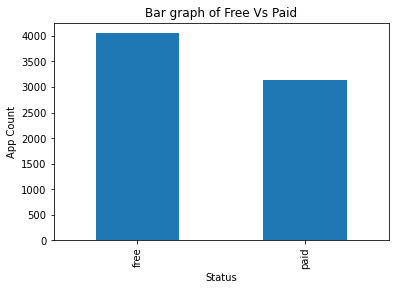

In [15]:
#plotting the Free Vs Paid apps using bar chart
plt.title('Bar graph of Free Vs Paid')
app['Status'].value_counts().plot.bar()
plt.xlabel('Status')
plt.ylabel('App Count')
plt.show()

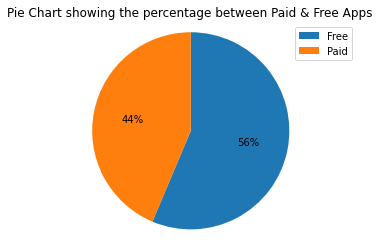

In [16]:
sorted_counts = app['Status'].value_counts()
labels = 'Free', 'Paid'
plt.title("Pie Chart showing the percentage between Paid & Free Apps")
plt.pie(sorted_counts, startangle = 90,
        counterclock = False, autopct = '%1.f%%');
plt.axis('equal')
plt.legend(labels = labels);


>__Findings:__
It's evident from the above graphs Free Apps are available more than Paid Apps

__Q2__ What is the Distribution of __Prices of Paid Apss__ ?

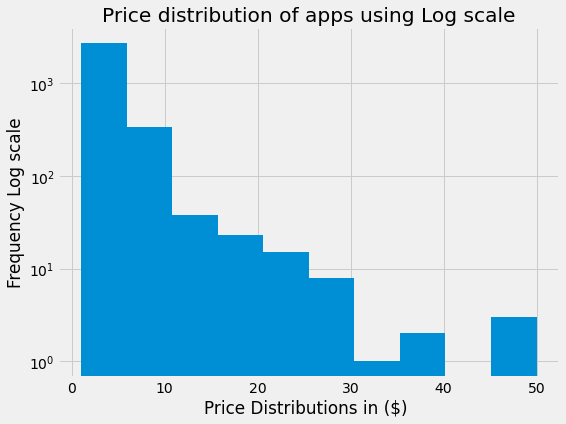

In [17]:
#to remove the outliers and create another dataframe
paidapps =app[((app.price < 50) & (app.price >0 ))]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

plt.hist(paidapps.price,log=True);
plt.title('Price distribution of apps using Log scale');
plt.ylabel("Frequency Log scale");
plt.xlabel("Price Distributions in ($) ");


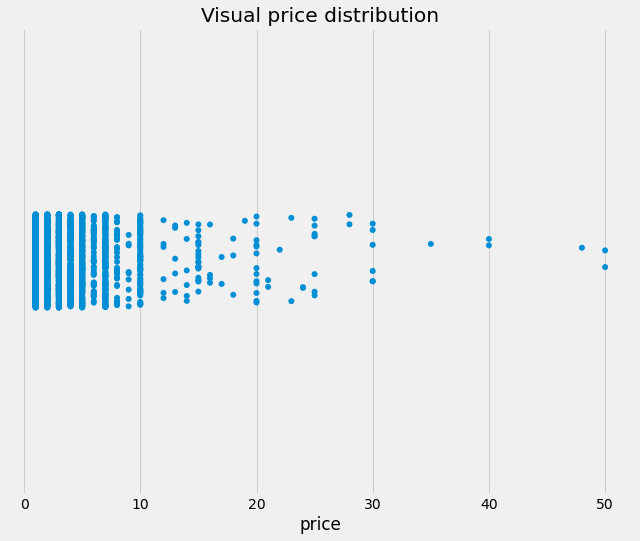

In [18]:
plt.figure(figsize=(10,8))
plt.title('Visual price distribution')
sns.stripplot(data=paidapps,x='price',jitter= True,orient = 'h' ,size=6)
plt.show()

In [19]:
print('min price of apps {}'.format(min(paidapps.price)))
print('max price of apps {}'.format(max(paidapps.price)))
print('average price of apps {}'.format(np.mean(paidapps.price)))

min price of apps 0.99
max price of apps 49.99
average price of apps 3.6753860880661913


In [20]:
print('There\'s is total of {} genres'.format(len(app.prime_genre.value_counts().index)))

There's is total of 23 genres


>__Findings:__ according to the graphs and my the programmatical assessment, There’s __23 Genre/Categories__ in the App Store, the __average__ price of an app is 3.67  , and __the least__ app costs 0.99 , and __the most expensive__ app would cost 49.99 , according the __histogram__ __the stripe plot__ most of the apps vary from 0 to 10 dollars, and few apps are above 30 dollars. 

__Q3__ What are the Top 10 Genres according to number of Apps Developed ?

In [21]:
app.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [22]:
app_genre = app.groupby(['prime_genre'])[['name']].count().reset_index().sort_values('name',ascending=False)
app_genre.columns = ['prime_genre','count']
top_genres = app_genre.head(10)

,prime_genre,count
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


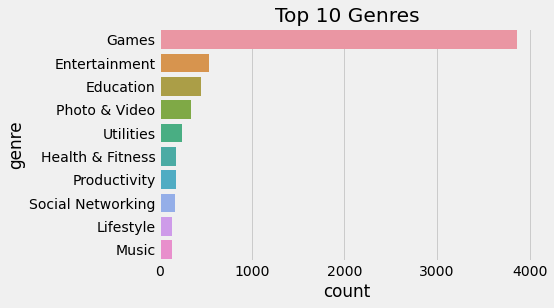

In [23]:
plt.title('Top 10 Genres')
sns.barplot(y = 'prime_genre',x = 'count', data=top_genres)
plt.xlabel('count')
plt.ylabel('genre')
top_genres

> __Findings:__ According to the Graph Above most apps are developed in __Games__, __Entertainment__, __Education__, __Photo & Video__ and ___Utilities___

__Q4__ What are the Least 10 Genres according to number of Apps Developed ?

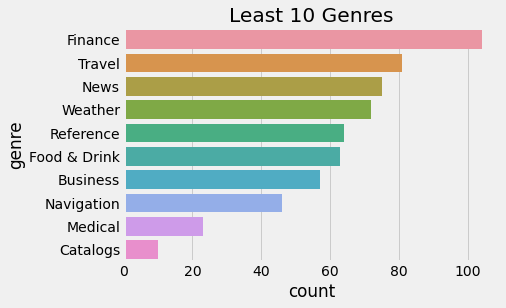

In [24]:
plt.title('Least 10 Genres')
top_genres = app_genre.tail(10)
sns.barplot(y = 'prime_genre',x = 'count', data=top_genres);
plt.xlabel('count');
plt.ylabel('genre');

In [25]:
top_genres

,prime_genre,count
5,Finance,104
20,Travel,81
13,News,75
22,Weather,72
16,Reference,64
6,Food & Drink,63
1,Business,57
12,Navigation,46
10,Medical,23
2,Catalogs,10


> __Findings:__ According to the Graph Above the least apps are developed in __Catalogs__, __Medical__, __Navigation__, __Business__ and ___Food  & Drink___

__Q5__ What Genres are most Rated ?

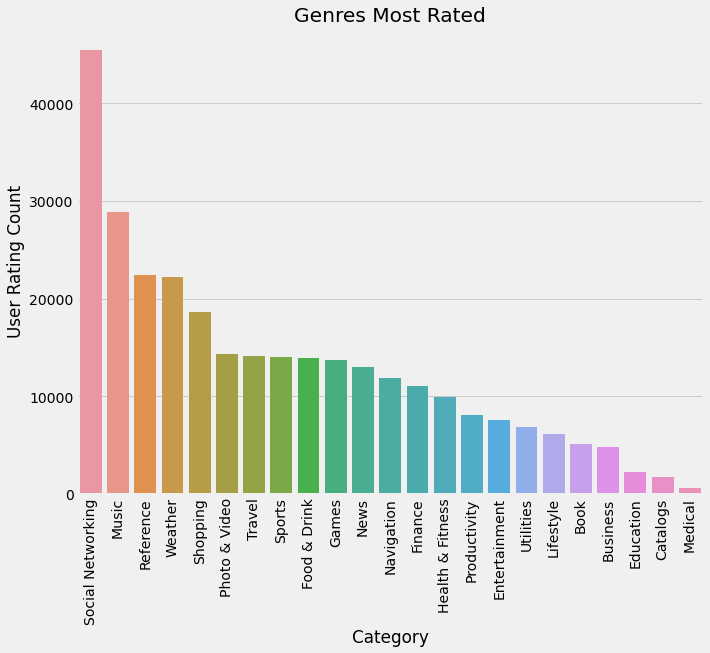

In [26]:
category = list(app.prime_genre.unique())
user_rating_count = []

for i in category:
    user_rating_count.append(app[app.prime_genre == i].rating_count_tot.mean())
rating_count = pd.DataFrame({'category':category,'user_rating_count':user_rating_count})
new_index = rating_count['user_rating_count'].sort_values(ascending=False).index.values
count = rating_count.reindex(new_index)


plt.figure(figsize=(10,8))
sns.barplot(x=count['category'], y=count['user_rating_count'])
plt.xticks(rotation= 90)
plt.xlabel('Category');
plt.ylabel('User Rating Count');
plt.title('Genres Most Rated');

> __Findings__: According to the bar chart above we see users give high ratings for __Social Netowrking__, __Music__,__Reference__,__Weather__ & __Shopping__ Apps, which makes sense.

__Q6__ What are the most successful apps according to revenue ?

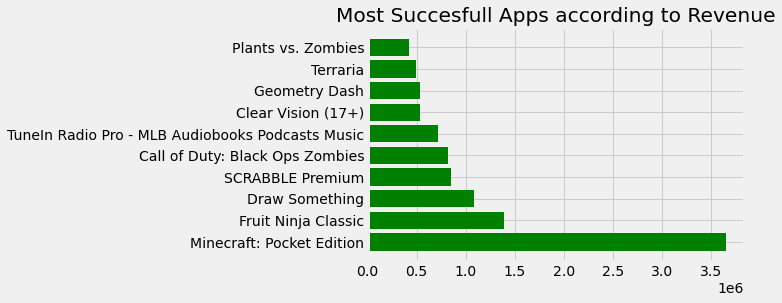

In [27]:
app['revenue'] = app.rating_count_tot * app.price
apps_revenue = app.sort_values("revenue", ascending=False)
subset_app_business = apps_revenue[:10]

plt.title('Most Succesfull Apps according to Revenue')
plt.barh(subset_app_business.name, subset_app_business.revenue,color='green');

In [28]:
subset_app_business

,name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,num_supported_dev,lang.num,Status,revenue
1052,Minecraft: Pocket Edition,147787776,6.99,522012,1148,4.5,4.5,Games,37,11,paid,3648863.88
348,Fruit Ninja Classic,104590336,1.99,698516,132,4.5,4.0,Games,38,13,paid,1390046.84
1114,Draw Something,84379648,2.99,360974,3,4.5,4.5,Games,38,1,paid,1079312.26
11,SCRABBLE Premium,227547136,7.99,105776,166,3.5,2.5,Games,37,6,paid,845150.24
999,Call of Duty: Black Ops Zombies,880267264,6.99,116601,5839,4.5,4.5,Games,43,1,paid,815040.99
158,TuneIn Radio Pro - MLB Audiobooks Podcasts Music,101925888,9.99,71609,99,4.5,4.0,Music,37,14,paid,715373.91
1182,Clear Vision (17+),37879808,0.99,541693,69225,4.5,4.5,Games,43,1,paid,536276.07
1877,Geometry Dash,83931136,1.99,266440,6263,5.0,4.5,Games,37,1,paid,530215.60
1936,Terraria,126036992,4.99,98036,11022,4.5,4.5,Games,37,5,paid,489199.64
302,Plants vs. Zombies,105379840,0.99,426463,680,5.0,4.0,Games,38,5,paid,422198.37


>__Findings__: according to the graph above, the most succesfull app is __Minecraft: Pocket Edition__ which had a revenue of around __3 Million__ followed by __Fruit Ninja__ having a revenue of __1.39 Million__. __Games__ seem to be one of the most profitable section according to the Data Provided. 

__Q7__ What are the all-time Favorite Apps ?

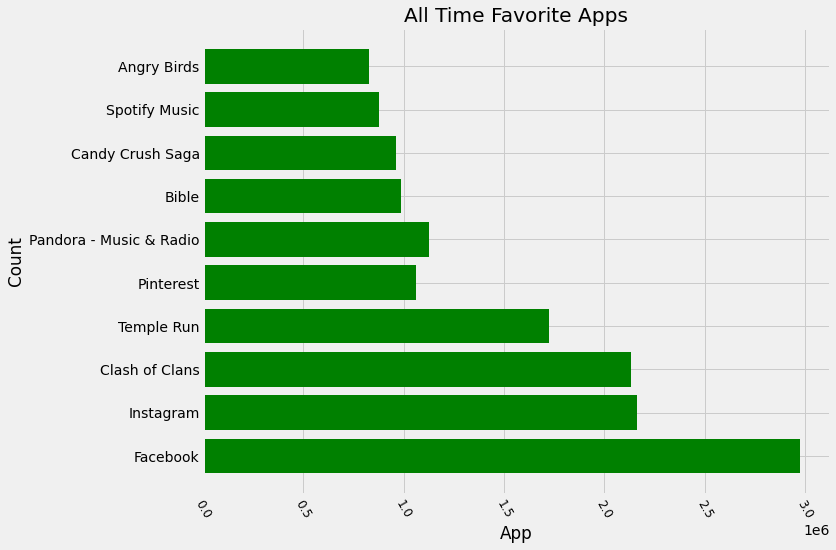

In [29]:
app["fav_tot"] = app["rating_count_tot"] * app["user_rating"]
fav_app_tot = app.sort_values("fav_tot", ascending=False)
fav_app_tot_subset = fav_app_tot[:10]
plt.figure(figsize = (10,8))
plt.title('All Time Favorite Apps')
plt.barh(fav_app_tot_subset.name, fav_app_tot_subset.rating_count_tot,color='green');
plt.xticks(rotation=(-60), fontsize=12);
plt.xlabel('App');
plt.ylabel('Count');

>__Findings__: According to the Graph above, the apps with the Highest Rating for all version adopted by the Developers are __Facebook__ , __Instagram__ & __Clash of Clans__. This Graph that most people use their phone to either use social media, play games or listen to music, and use it for religion purposes.

__Q8__ What are the current Favorite Apps?

/Users/zaazaa/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zaazaa/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 57376 missing from current font.
  font.set_text(s, 0, flags=flags)


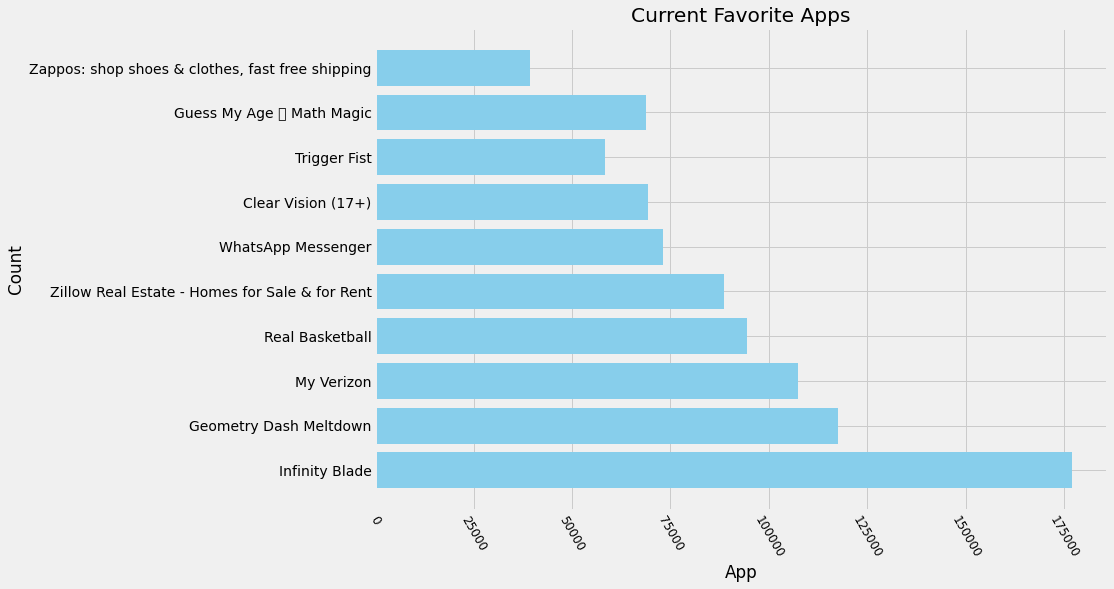

In [30]:
app["fav_ver"] = app["rating_count_ver"] * app["user_rating_ver"]
fav_app_ver = app.sort_values("fav_ver", ascending=False)
plt.figure(figsize=[ 11.69, 8.27])
fav_app_ver_subset = fav_app_ver[:10]
plt.title('Current Favorite Apps')
plt.barh(fav_app_ver_subset.name, fav_app_ver_subset.rating_count_ver,color='skyblue');
plt.xticks(rotation=(-60), fontsize=12);
plt.xlabel('App');
plt.ylabel('Count');

In [31]:
fav_app_ver.head(10)

,name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,num_supported_dev,lang.num,Status,revenue,fav_tot,fav_ver
498,Infinity Blade,624107810,0.99,326482,177050,5.0,5.0,Games,43,13,paid,323217.18,1632410.0,885250.0
4467,Geometry Dash Meltdown,55445504,0.00,117470,117470,4.5,4.5,Games,40,1,free,0.00,528615.0,528615.0
690,My Verizon,150791168,0.00,126948,107245,4.5,4.5,Utilities,37,2,free,0.00,571266.0,482602.5
1780,Real Basketball,70336512,0.00,198050,94315,4.5,4.5,Games,43,1,free,0.00,891225.0,424417.5
127,Zillow Real Estate - Homes for Sale & for Rent,132632576,0.00,342969,88478,4.5,4.5,Lifestyle,37,1,free,0.00,1543360.5,398151.0
125,WhatsApp Messenger,135044096,0.00,287589,73088,4.5,4.5,Social Networking,12,35,free,0.00,1294150.5,328896.0
1182,Clear Vision (17+),37879808,0.99,541693,69225,4.5,4.5,Games,43,1,paid,536276.07,2437618.5,311512.5
1361,Trigger Fist,144196155,0.00,69624,58269,4.5,4.5,Games,43,1,free,0.00,313308.0,262210.5
154,Guess My Age  Math Magic,767126,0.00,123190,68841,3.0,3.0,Education,47,1,free,0.00,369570.0,206523.0
545,"Zappos: shop shoes & clothes, fast free shipping",70325248,0.00,103655,39452,5.0,5.0,Shopping,37,1,free,0.00,518275.0,197260.0


>__Findings__: According to the Graph above, the apps with the Highest Rating for their latest version adopted by the Developers are __Infinity Blade__ , __My Verizon__ & __Geometry Dash Meltdown__.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> we can deduce from the above graphs that most of the apps are below 30 and there's a few apps above that. and most apps are between 0.99 and 10.00

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i first removed the outliers in the wrangling process of cleaning the data, and then i used a log scale so my graphs would be more realistic.

<a id="bi"></a>

## Bivariate Exploration


#### To conduct a better analysis, we will focus on the top Genres and evaluate their Free Vs Paid  ratio and check if there’s any type of relationship between any variables/features in the dataset:

### Questions to be Analyzed:
-	__Q1__ What is the Percentage of Free & Paid Apps in Each Popular Genre?
-	__Q2__ is there any type of Correlation/Relationship between any Variables/Features ?

In [32]:
l = app.prime_genre.value_counts().index[:4]

def catag(x):
    if x in l:
        return x
    else:
        return "Other"
    
    
app['broad_genre'] = app.prime_genre.apply(lambda x: catag(x))

In [33]:
app.drop(labels = ['broad_genre'], axis = 1)

data = pd.DataFrame(app['broad_genre'].value_counts())

data.sort_index()

free  = app[app['price'] == 0].broad_genre.value_counts().to_frame(name = 'free').sort_index()

paid = app[app['price']!= 0].broad_genre.value_counts().to_frame(name =  'paid').sort_index()

#### Tables Below show the count of free apps and paid app in the Popular Genres

In [34]:
free

,free
Education,132
Entertainment,334
Games,2257
Other,1166
Photo & Video,167


In [35]:
paid

,paid
Education,321
Entertainment,201
Games,1605
Other,832
Photo & Video,182


__Q1__ What is the Percentage of Free & Paid Apps in Each Popular Genre?

In [36]:
free = app[app.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = app[app.price>0].broad_genre.value_counts().sort_index().to_frame()
total = app.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total
dist

,free,paid,total,paid_per,free_per
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Other,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


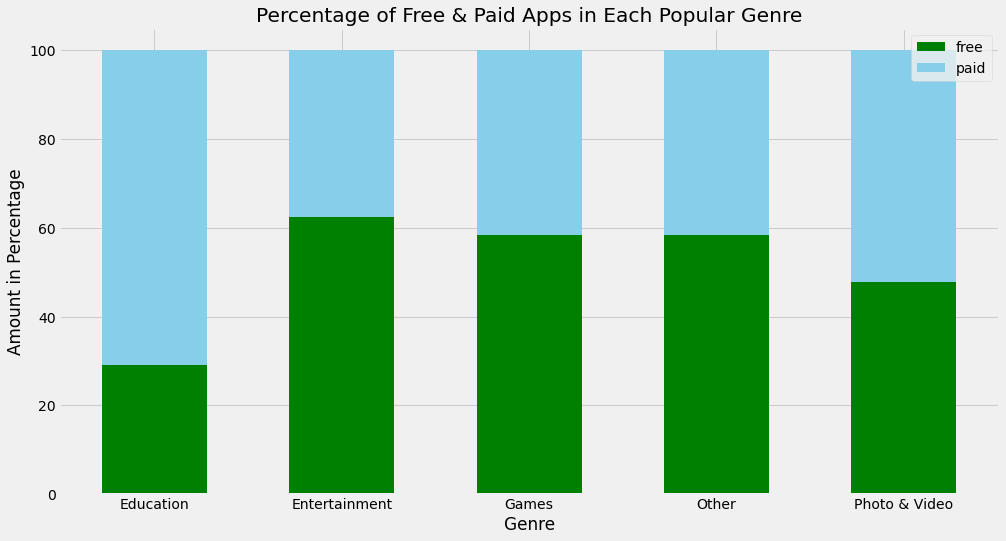

In [37]:
list_free= dist.free_per.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(dist.paid_per.tolist())

plt.figure(figsize=(15,8))
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

plt.title("Percentage of Free & Paid Apps in Each Popular Genre")
plt.xlabel('Genre')
plt.ylabel('Amount in Percentage')
p1 = plt.bar(ind, tuple_free, width, color='green')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='skyblue')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()
# for pie chart
pies = dist[['free_per','paid_per']]
pies.columns=['free %','paid %']

plt.show()



> __Findings__: Above Table and Graph show the percentage of and count of __Free VS Paid__ Apps in each Genre, showing the __Education__ section has more paid apps than free apps with 70.8% being Paid Apps, other than that most apps have a fair ratio between __Free VS Paid__

__Q2__ is there any type of Correlation/Relationship between any Variables/Features ?

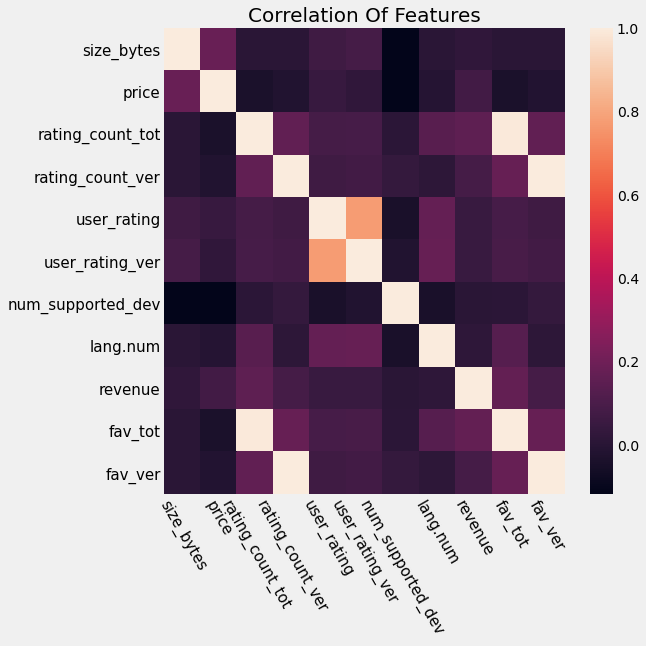

In [38]:
corr_apps = app.corr()
corr_apps["rating_count_tot"].sort_values(ascending=False)


plt.figure(figsize=(8,8))
plt.title("Correlation Of Features", fontsize=20)
sns.heatmap(corr_apps)
plt.xticks(rotation=(-60), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [39]:
corr_apps

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,num_supported_dev,lang.num,revenue,fav_tot,fav_ver
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.004614,0.024107,0.005350,0.007081
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,-0.006713,0.077326,-0.039188,-0.017527
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.137675,0.156085,0.993135,0.162034
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.013287,0.085058,0.175901,0.995692
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.170976,0.049896,0.090801,0.069146
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.175580,0.049037,0.093356,0.078094
num_supported_dev,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.041681,0.004588,0.009694,0.035113
lang.num,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,1.000000,0.021070,0.134602,0.014195
revenue,0.024107,0.077326,0.156085,0.085058,0.049896,0.049037,0.004588,0.021070,1.000000,0.166734,0.086464
fav_tot,0.005350,-0.039188,0.993135,0.175901,0.090801,0.093356,0.009694,0.134602,0.166734,1.000000,0.175220


>__Findings__: according to the Correlation Heatmap and Correlation, There isn't any direct relationship between a variable and the other having an effect on each other.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, I started questioning if paid Apps are actually worth downloading and paying for and in which categories, are iPhone apps actually good, I started by seeing the User Rating Distribution using a Violin Plot by seeing the most popular Apps Genres calling them “Broad Genre” and Neglecting the least apps developed in other genres, by seeing their user_rating in Free & Paid versions. And deciding upon the mean of each category.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One of the main, relationships I was suspecting may have an impact on the price was the size of an app. Meaning if it was bigger in size it's price will be higher but apparently there was no relationship.

<a id="multi"></a>
## Multivariate Exploration

### Questions to be Analyzed:

- __Q1__ Does The Size of an App has an effect on the price ?
- __Q2__ Do Paid apps receive better Rating than Free Apps ?
- __Q3__ What is the Average Price of Apps in the Top 5 Genres ?



__Q1__ Does The Size of an App has an effect on the price ?

In [40]:
def size(x):
    mb = x/1000000
    return mb
    
app['size_mb'] = app.size_bytes.apply(lambda x : size(x))
app.head(5)

,name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre,num_supported_dev,lang.num,Status,revenue,fav_tot,fav_ver,broad_genre,size_mb
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,Games,38,10,paid,84955.08,85168.0,117.0,Games,100.788224
1,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,Productivity,37,23,free,0.00,644260.0,91.0,Other,158.578688
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,Weather,37,3,free,0.00,660040.5,12699.0,Other,100.524032
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,Shopping,37,9,free,0.00,1048964.0,2920.5,Other,128.512000
4,Bible,92774400,0.00,985920,5320,4.5,5.0,Reference,37,45,free,0.00,4436640.0,26600.0,Other,92.774400


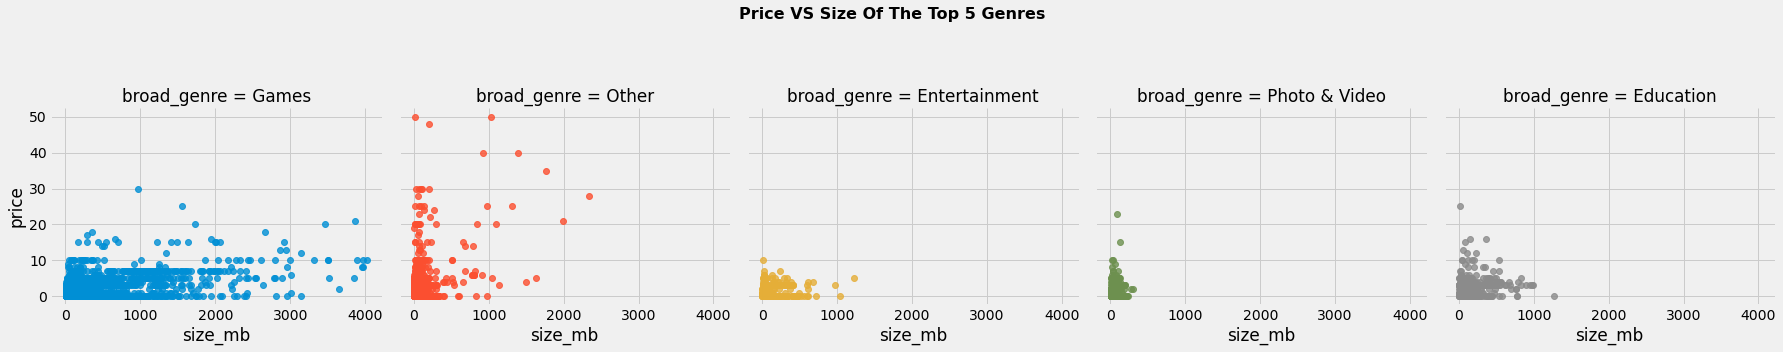

In [41]:
paid_apps_desc = app[app['price'] <50];
sns.lmplot(data = paid_apps_desc, x = 'size_mb', y = 'price', col = 'broad_genre',scatter = True,fit_reg = False, hue  = 'broad_genre');
plt.suptitle('Price VS Size Of The Top 5 Genres', fontsize=16, fontweight='bold');
plt.subplots_adjust(top=0.7);
plt.show();

> __Findings__: Apparently, There's no relation between the size of the app and it’s price.

__Q2__ Do Paid apps receive better Rating than Free Apps ?

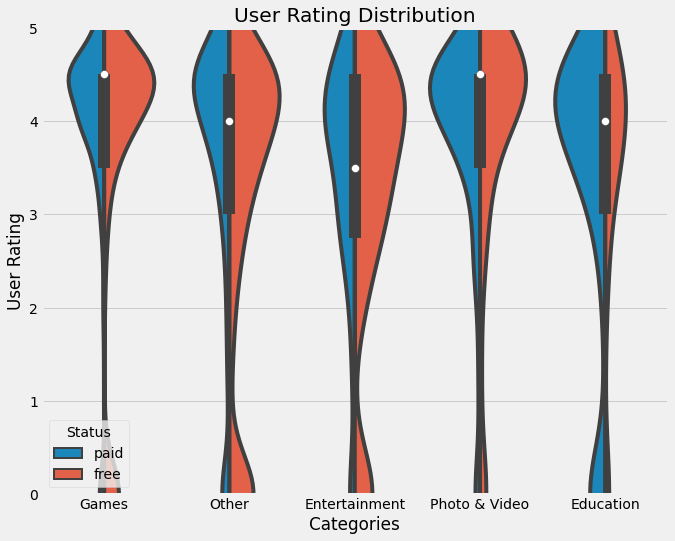

In [42]:
plt.figure(figsize = (10,8))
plt.ylim(0,5)
sns.violinplot(data = app, y = 'user_rating', x = 'broad_genre', hue = 'Status', split = True, scale = 'count' )
plt.style.use("fast")
plt.xlabel('Categories')
plt.ylabel('User Rating')
plt.title('User Rating Distribution')
plt.show()

> __Findings__: In the above graph, I was trying to check if Paid Apps received better rating according to users and unexpectedly, some Genres proved that their paid apps were perceived better by users. Apperently Paid apps in Photo & Video has a mean of 4.5 rating, which means they perform better than Free apps in these sections

__Q3__ What is the Average Price of Apps in the Top 5 Genres ?

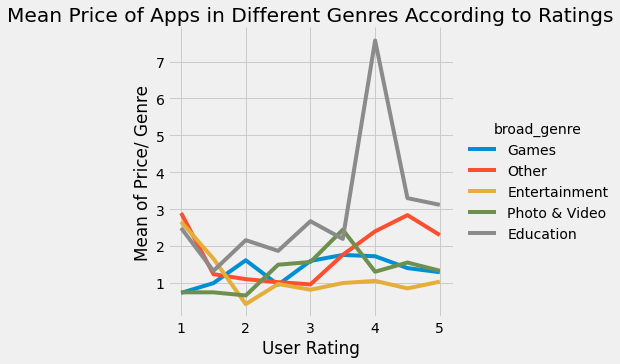

In [43]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)


bin_edges = np.arange(0.25, app['user_rating'].max()+0.5, 0.5)
g = sns.FacetGrid(data = app, hue = 'broad_genre', height = 5);
g.map(mean_poly, "user_rating", "price", bins = bin_edges);
plt.title("Mean Price of Apps in Different Genres According to Ratings")
g.set_ylabels('Mean of Price/ Genre');
g.set_xlabels('User Rating');
g.add_legend();

>__Findings__: In the above table and graph, i wanted to know the ratio between the amount of Paid and Free apps in popular Genres to check, which of the popular categories had a higher ratio between both (Free vs Paid). Also i wanted to check how prices vary according the user rating in different category

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There wasn't really any feature that affected each in This Dataset according to the Correlation Heatmap and Table. In the previous section my only concern was "Would the size of big apps require purchase but that wasn't the case.

### Were there any interesting or surprising interactions between features?

> No not really!

### Thank You

#### Sources:

- This dataset was downloaded from kaggle.com
- stackoverflow.com

In [44]:
app.to_csv('master_AppleStore.csv')